<a href="https://colab.research.google.com/github/kavyaaaa16/Sentiment_analysis/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
test_df= pd.read_csv('/content/train_labeled.csv')
test_df

,title,author,rating,rating_count,genre,review,label
0,No One Was Supposed to Die at This Wedding,Catherine Mack,3.76,"1,373",Mystery,book 2 in the vacation mysteries kicks off wit...,positive
1,One in Four,Lucinda Berry,3.42,"6,402",Thriller,a complex heartrending plot one in four was th...,positive
2,A Court of Mist and Fury,Sarah J. Maas,4.64,"2,865,240",Fantasy,when i finished this book the mountains trembl...,positive
3,The Love Haters,Katherine Center,3.93,"16,714",Romance,5,neutral
4,Pet Sematary,Stephen King,4.08,"661,096",Horror,cause what you buy is what you own and what yo...,neutral
...,...,...,...,...,...,...,...
1123,Dracula,"Bram Stoker, Rubén Toledo (Illustrations), Nin...",4.02,"1,400,904",Classics,two things about this book1 it is a really gre...,positive
1124,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,"3,659,032",Fantasy,is it true that you shouted at professor umbri...,positive
1125,The Gilded Cage,Lynette Noni,4.27,"87,819",Fantasy,ending went absolutely crazy yet again,negative
1126,Breath: The New Science of a Lost Art,James Nestor,4.15,"105,849",Nonfiction,in terms of single subject science books breat...,positive


In [3]:
twitter=pd.read_csv('/content/twitter_training.csv')
twitter

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
twitter.columns=['id', 'category','label', 'review']
twitter

,id,category,label,review
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
twitter.isnull().sum()

,0
id,0
category,0
label,0
review,686


In [6]:
twitter.dropna(subset=['review'],inplace=True)
twitter.isnull().sum()

,0
id,0
category,0
label,0
review,0


In [7]:
twitter.drop(['id', 'category'], axis='columns')

,label,review
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [8]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.1 MB/s eta 0:00:00


In [9]:
import re
import emoji

def cleaning(text):
  text=text.lower()
  text=emoji.replace_emoji(text, replace='')
  text=re.sub(r"http\S+", "", text)
  text= re.sub(r"[^a-zA-Z0-9\s]", "", text)
  text=re.sub(r"(.)\1{2,}", r"\1", text)
  text=re.sub(r"\s+", " ", text).strip()
  return text

twitter['review']=twitter['review'].astype(str).apply(cleaning)

In [10]:
valid_labels=['Positive', 'Negative', 'Neutral']
twitter=twitter[twitter['label'].isin(valid_labels)]
twitter=twitter.reset_index(drop=True)

In [11]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

topword_list=stopwords.words('english') #will give a list of stopwords
stop=set(stopwords.words('english'))  #we convert it to set for faster checking
print(stop)

{'here', 'mightn', "she'll", "hasn't", 'my', 'they', 'all', 'so', 'by', "isn't", "we'd", 'haven', 'ma', 'needn', 'while', 've', "haven't", 'do', 'isn', "it'll", 'those', 'can', 're', "they'd", 'wasn', 'of', 'weren', 'some', 'because', 'll', 'off', 't', 'having', 'too', "i've", 'she', 'hers', 'own', 'his', 'into', 'and', 'does', 'such', 'these', 'o', "they're", 'her', "i'll", 'wouldn', 'just', 'not', 'your', 'over', 'both', "mustn't", 'further', 'on', 'when', 'where', 'its', "i'd", 'during', "she'd", "we're", 'through', "you'll", 'be', 'don', 's', 'why', 'doesn', 'once', "didn't", 'most', 'should', 'theirs', "needn't", 'other', 'or', 'below', "i'm", 'won', 'before', "we've", 'had', 'i', 'few', 'hadn', 'has', "he'll", "it'd", 'ourselves', 'after', 'very', "she's", 'yourselves', "they've", 'aren', 'an', 'are', "mightn't", 'it', 'myself', 'themselves', 'the', 'them', 'me', 'you', 'will', 'between', 'herself', "they'll", 'himself', 'yourself', 'same', 'am', 'itself', 'down', 'again', 'in', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
def remove_stopwords(text):
  words=text.split()
  filtered=[w for w in words if w not in stop]
  return ' '.join(filtered)

twitter['review']=twitter['review'].apply(remove_stopwords)

In [13]:
twitter

,id,category,label,review
0,2401,Borderlands,Positive,coming borders kill
1,2401,Borderlands,Positive,im getting borderlands kill
2,2401,Borderlands,Positive,im coming borderlands murder
3,2401,Borderlands,Positive,im getting borderlands 2 murder
4,2401,Borderlands,Positive,im getting borderlands murder
...,...,...,...,...
61115,9200,Nvidia,Positive,realized windows partition mac like 6 years be...
61116,9200,Nvidia,Positive,realized mac window partition 6 years behind n...
61117,9200,Nvidia,Positive,realized windows partition mac 6 years behind ...
61118,9200,Nvidia,Positive,realized windows partition mac like 6 years be...


In [14]:
test_df['review']=test_df['review'].astype(str).apply(cleaning)

In [15]:
test_df=test_df.drop(['title','author', 'rating','rating_count', 'genre'], axis='columns')


In [16]:
test_df

,review,label
0,book 2 in the vacation mysteries kicks off wit...,positive
1,a complex heartrending plot one in four was th...,positive
2,when i finished this book the mountains trembl...,positive
3,5,neutral
4,cause what you buy is what you own and what yo...,neutral
...,...,...
1123,two things about this book1 it is a really gre...,positive
1124,is it true that you shouted at professor umbri...,positive
1125,ending went absolutely crazy yet again,negative
1126,in terms of single subject science books breat...,positive


In [16]:
test_df['review']=test_df['review'].apply(remove_stopwords)
test_df

,review,label
0,book 2 vacation mysteries kicks bang another m...,positive
1,complex heartrending plot one four epitome luc...,positive
2,finished book mountains trembleddo need remind...,positive
3,5,neutral
4,cause buy always comes home youlouis creed fam...,neutral
...,...,...
1123,two things book1 really great creepy story des...,positive
1124,true shouted professor umbridgeyesyou called l...,positive
1125,ending went absolutely crazy yet,negative
1126,terms single subject science books breath bit ...,positive


In [17]:
# Fix label typos and standardize to lowercase
def clean_label(label):
    label = label.lower()
    if label == 'neagtive':
        return 'negative'
    return label

twitter['label'] = twitter['label'].apply(clean_label)
test_df['label'] = test_df['label'].apply(clean_label)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer( min_df=1, max_df=1.0)
cv_train=cv.fit_transform(twitter['review'])
cv_test=cv.transform(test_df['review'])

print('BOW_cv_train:', cv_train.shape)
print('BOW_cv_val:', cv_test.shape)

BOW_cv_train: (61120, 33876)
BOW_cv_val: (1128, 33876)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv=TfidfVectorizer(min_df=1, max_df=1.0, use_idf=True)
tv_train=tv.fit_transform(twitter['review'])
tv_test=tv.transform(test_df['review'])

print('TFIDF_train:', tv_train.shape)
print('TFIDF_test:', tv_test.shape)

TFIDF_train: (61120, 33876)
TFIDF_test: (1128, 33876)


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Extract text and labels
train_texts = twitter['review'].astype(str).tolist()
train_labels = twitter['label'].tolist()

test_texts = test_df['review'].astype(str).tolist()
test_labels = test_df['label'].tolist()

train_labels = [label.lower() for label in train_labels]
test_labels = [label.lower() for label in test_labels]

# Encode labels
label_encoder = LabelEncoder()
label_encoder.fit(train_labels + test_labels)

y_train = to_categorical(label_encoder.transform(train_labels))
y_test = to_categorical(label_encoder.transform(test_labels))

# Tokenization
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts)

X_train = tokenizer.texts_to_sequences(train_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))  # smaller embedding

model.add(Bidirectional(LSTM(32, return_sequences=True)))  # smaller LSTM
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Bidirectional(LSTM(32)))  # smaller LSTM
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))  # smaller dense layers
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(3, activation='softmax'))  # output layer
 # output layer for 3 classes

# Compile
learning_rate = 0.0005
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 150s 299ms/step - accuracy: 0.4296 - loss: 1.3344 - val_accuracy: 0.3568 - val_loss: 1.2575
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 200s 296ms/step - accuracy: 0.7779 - loss: 0.5719 - val_accuracy: 0.2714 - val_loss: 2.3107
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 143s 298ms/step - accuracy: 0.8620 - loss: 0.3801 - val_accuracy: 0.3065 - val_loss: 2.5919
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 201s 296ms/step - accuracy: 0.8932 - loss: 0.3007 - val_accuracy: 0.4020 - val_loss: 2.5012


In [26]:
print(dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


{np.str_('negative'): 0, np.str_('neutral'): 1, np.str_('positive'): 2}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional


# Define model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes: negative, neutral, positive

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64,
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
955/955 ━━━━━━━━━━━━━━━━━━━━ 221s 226ms/step - accuracy: 0.6134 - loss: 0.8214 - val_accuracy: 0.3317 - val_loss: 2.0664
Epoch 2/5
955/955 ━━━━━━━━━━━━━━━━━━━━ 258s 223ms/step - accuracy: 0.8613 - loss: 0.3600 - val_accuracy: 0.3668 - val_loss: 2.3307
Epoch 3/5
955/955 ━━━━━━━━━━━━━━━━━━━━ 269s 230ms/step - accuracy: 0.9019 - loss: 0.2543 - val_accuracy: 0.3266 - val_loss: 3.6334


WITH GLOVE

In [21]:
import numpy as np

# Path to the GloVe file you want to use (e.g., 100d)
glove_path = 'glove.6B.100d.txt'

embeddings_index = {}

with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = vector

print(f'Loaded {len(embeddings_index)} word vectors.')


Loaded 400000 word vectors.


In [22]:
embedding_dim = 100  # use 50, 100, 200, or 300 depending on the GloVe file you picked

embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i >= max_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(
    input_dim=max_words,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False  # freeze embeddings (set True if you want to fine-tune)
))

model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.3))

model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(3, activation='softmax'))

# Compile
learning_rate = 0.001
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 682s 1s/step - accuracy: 0.5542 - loss: 0.9411 - val_accuracy: 0.4007 - val_loss: 1.2349
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 714s 1s/step - accuracy: 0.6533 - loss: 0.7928 - val_accuracy: 0.3590 - val_loss: 1.3251
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 764s 2s/step - accuracy: 0.7018 - loss: 0.7016 - val_accuracy: 0.3670 - val_loss: 1.6293
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 761s 2s/step - accuracy: 0.7424 - loss: 0.6241 - val_accuracy: 0.3963 - val_loss: 1.5531


In [37]:
model.save("lstm_glove_model.h5")


In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Test Accuracy: {accuracy:.4f}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.3754 - loss: 1.2295
LSTM Test Accuracy: 0.4007


In [ ]:
model.save("lstm_model.h5")


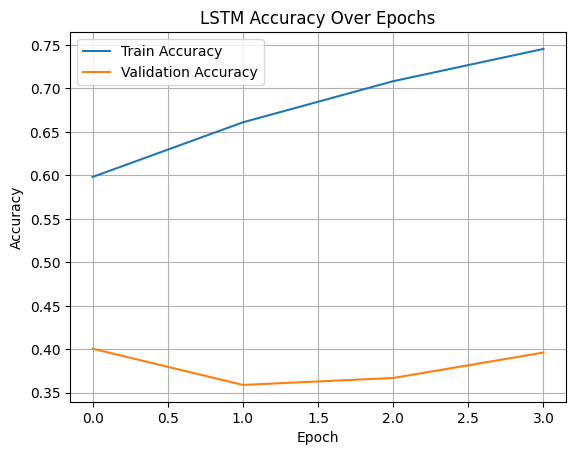

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))
print(confusion_matrix(y_true, y_pred))


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step
              precision    recall  f1-score   support

    negative       0.19      0.71      0.30       133
     neutral       0.16      0.29      0.21       156
    positive       0.90      0.37      0.52       839

    accuracy                           0.40      1128
   macro avg       0.42      0.46      0.35      1128
weighted avg       0.71      0.40      0.45      1128

[[ 95  28  10]
 [ 85  46  25]
 [314 214 311]]


-----------------------------------------------------

In [27]:
my_test=pd.read_csv('/content/books_test.csv')
my_test

,title,author,rating,rating_count,genre,review,label
0,The Enemy’s Daughter,Melissa Poett,3.93,392,Fantasy,ive been reading a lot of romance lately thank...,positive
1,Supercommunicators: How to Unlock the Secret L...,Charles Duhigg,4.00,"29,732",Nonfiction,this book shows us how to become supercommunic...,positive
2,Empire of AI: Dreams and Nightmares in Sam Alt...,Karen Hao,4.21,106,Nonfiction,tldr empire of ai is not the definitive chroni...,negative
3,A Court of Thorns and Roses,Sarah J. Maas,4.17,"37,62,222",Fantasy,note from 4172023 so someone reported this for...,negative
4,Night Sky with Exit Wounds,Ocean Vuong,4.18,"46,912",Poetry,this is a lovely lovely book of poems nearly e...,positive
...,...,...,...,...,...,...,...
194,The Let Them Theory,Mel Robbins,4.15,"1,15,195",Self Help,i rarely write reviews but this book feels lik...,negative
195,Mockingjay,Suzanne Collins,4.11,"35,42,248",Young Adult,i keep switching the rating of this book from ...,positive
196,Pet Sematary,Stephen King,4.08,"6,61,096",Horror,i absolutely loved rereading pet sematary the ...,positive
197,A Court of Mist and Fury,Sarah J. Maas,4.64,"28,65,240",Fantasy,rating all the stars in the universe i needed ...,positive


In [28]:
my_test['review']=my_test['review'].astype(str).apply(cleaning)

In [29]:
my_test=my_test.drop(['title','author', 'rating','rating_count', 'genre'], axis='columns')


In [30]:
my_test

,review,label
0,ive been reading a lot of romance lately thank...,positive
1,this book shows us how to become supercommunic...,positive
2,tldr empire of ai is not the definitive chroni...,negative
3,note from 4172023 so someone reported this for...,negative
4,this is a lovely lovely book of poems nearly e...,positive
...,...,...
194,i rarely write reviews but this book feels lik...,negative
195,i keep switching the rating of this book from ...,positive
196,i absolutely loved rereading pet sematary the ...,positive
197,rating all the stars in the universe i needed ...,positive


In [31]:
my_test['review']=my_test['review'].apply(remove_stopwords)
my_test

,review,label
0,ive reading lot romance lately thanks arcs kno...,positive
1,book shows us become supercommunicators superc...,positive
2,tldr empire ai definitive chronicle ai revolut...,negative
3,note 4172023 someone reported unmarked spoiler...,negative
4,lovely lovely book poems nearly every poem end...,positive
...,...,...
194,rarely write reviews book feels like personal ...,negative
195,keep switching rating book 5 4 5 changing opin...,positive
196,absolutely loved rereading pet sematary experi...,positive
197,rating stars universe needed dead agreedyou ne...,positive


In [32]:
# Fix label typos and standardize to lowercase
def clean_label(label):
    label = label.lower()
    if label == 'neagtive':
        return 'negative'
    return label

my_test['label'] = my_test['label'].apply(clean_label)


In [33]:
test_texts = my_test['review'].astype(str).tolist()
test_labels = my_test['label'].tolist()

y_test = to_categorical(label_encoder.transform(test_labels))
X_test = tokenizer.texts_to_sequences(test_texts)
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')


In [34]:
X_test = tokenizer.texts_to_sequences(test_texts)
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')


In [35]:
y_test = to_categorical(label_encoder.transform(test_labels))


In [36]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Accuracy on manually labeled test set: {accuracy:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.4814 - loss: 1.0906
LSTM Accuracy on manually labeled test set: 0.4673
